# Titanic kaggle clone coding

In [2]:
!pip install missingno

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

In [4]:
plt.style.use('seaborn')
sns.set(font_scale=2.5)

# 그래프를 여기에 바로 보여준다.
%matplotlib inline


In [5]:
df_train = pd.read_csv('../datas/train.csv')
df_test = pd.read_csv('../datas/test.csv')

In [6]:
df_train.head(10)
# data type 확인
# continuous, category

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [7]:
df_train.describe()
# Age에 null data가 있음을 확인가능

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df_train.shape

(891, 12)

In [9]:
#df_train.max()

In [10]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [11]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [12]:
for col in df_train.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
    # 오른쪽 정렬 '{:<10}'은 왼쪽 정렬, null데이터의 비율을 구함.
    print(msg)


column: PassengerId	 Percent of NaN value: 0.00%
column:   Survived	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 19.87%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.00%
column:      Cabin	 Percent of NaN value: 77.10%
column:   Embarked	 Percent of NaN value: 0.22%


In [13]:
df_train[col].isnull().sum() # False 0 이기때문에 True가 두개라는 뜻 (null이 두개다)

2

In [14]:
for col in df_test.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_test[col].isnull().sum() / df_test[col].shape[0]))
    # 오른쪽 정렬 '{:<10}'은 왼쪽 정렬, null데이터의 비율을 구함.
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 20.57%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.24%
column:      Cabin	 Percent of NaN value: 78.23%
column:   Embarked	 Percent of NaN value: 0.00%


<Axes: >

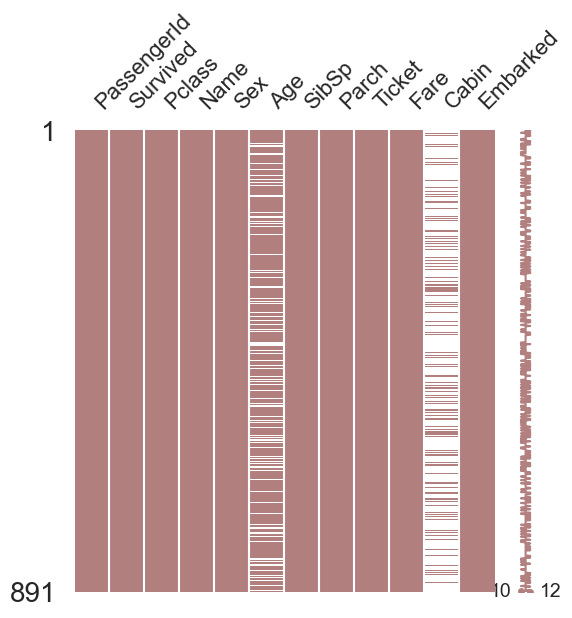

In [15]:
msno.matrix(df = df_train.iloc[:, :], figsize=(6, 6), color = (0.7, 0.5, 0.5)) # 공백은 null값

In [16]:
df_train.iloc[:5, :5]

,PassengerId,Survived,Pclass,Name,Sex
0,1,0,3,"Braund, Mr. Owen Harris",male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female
2,3,1,3,"Heikkinen, Miss. Laina",female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female
4,5,0,3,"Allen, Mr. William Henry",male


<Axes: >

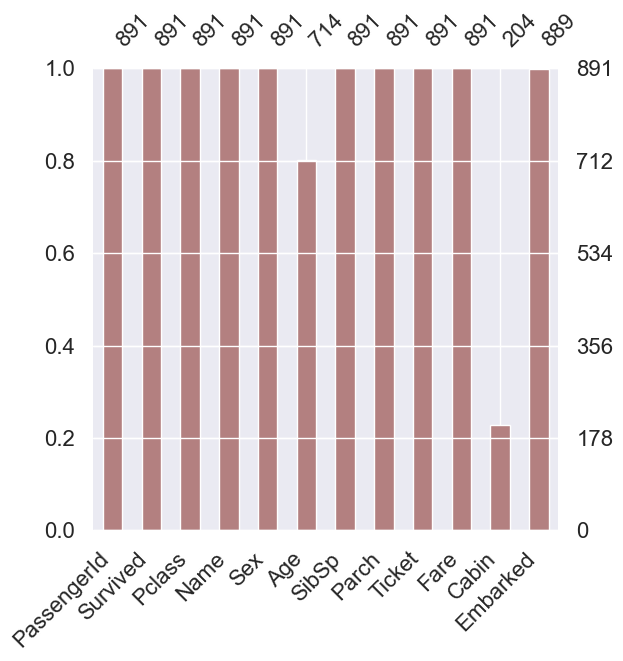

In [17]:
msno.bar(df = df_train.iloc[:, :], figsize=(6, 6), color = (0.7, 0.5, 0.5)) # 공백은 null값

#### target label이 어떤 distribution을 가지는 지 확인하는 것이 좋다,

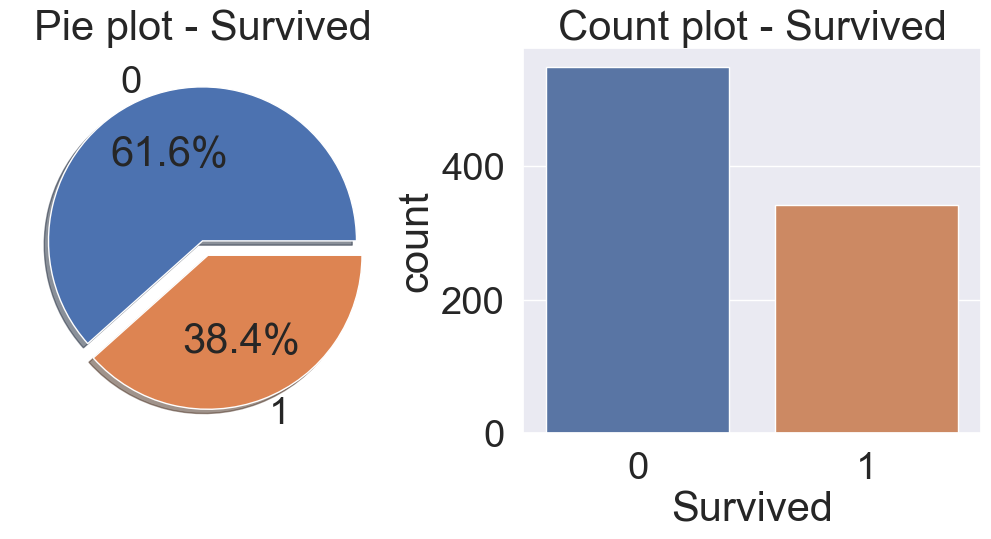

In [18]:
f, ax = plt.subplots(1, 2, figsize=(13,5))

df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct = '%1.1f%%', ax = ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot(x='Survived', data = df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')
plt.show()


<Axes: xlabel='Survived'>

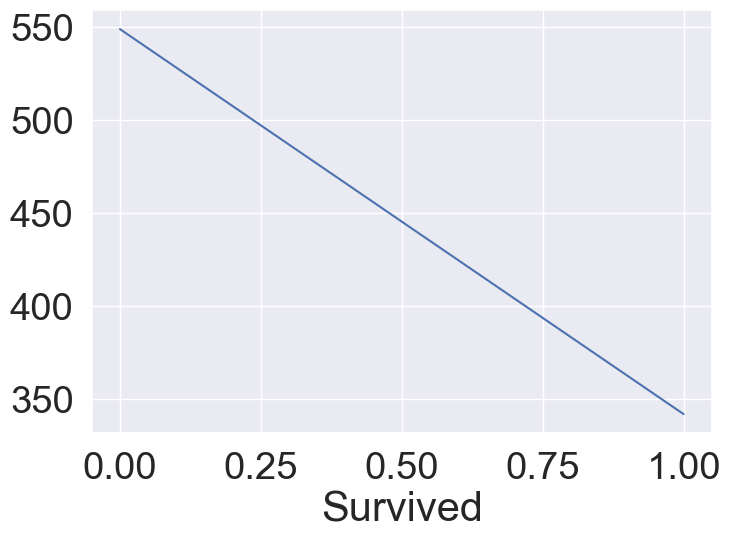

In [19]:
#plt.plot(df_train['Survived'].value_counts())
df_train['Survived'].value_counts().plot()

In [20]:
df_train.shape # feature가 12개

(891, 12)

## 2.1 Pclass

In [21]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count() # 전체 승객 수

,Survived
Pclass,
1,216
2,184
3,491


In [22]:
df_train[['Pclass', 'Survived']] # list형태로 묶는 것 확인하기.

,Pclass,Survived
0,3,0
1,1,1
2,3,1
3,1,1
4,3,0
...,...,...
886,2,0
887,1,1
888,3,0
889,1,1


In [23]:
df_train[['Pclass', 'Survived']].groupby(['Pclass']).sum() # 생존자 수

,Survived
Pclass,
1,136
2,87
3,119


In [24]:
df_train['Survived'].unique()

array([0, 1], dtype=int64)

In [25]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='cool')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [26]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean() #평균

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


<Axes: xlabel='Pclass'>

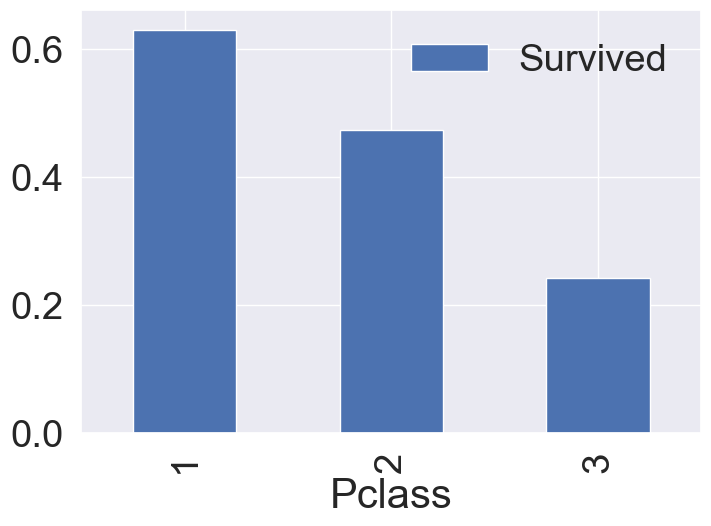

In [27]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()
# Pclass가 높을수록 생존률이 높다.

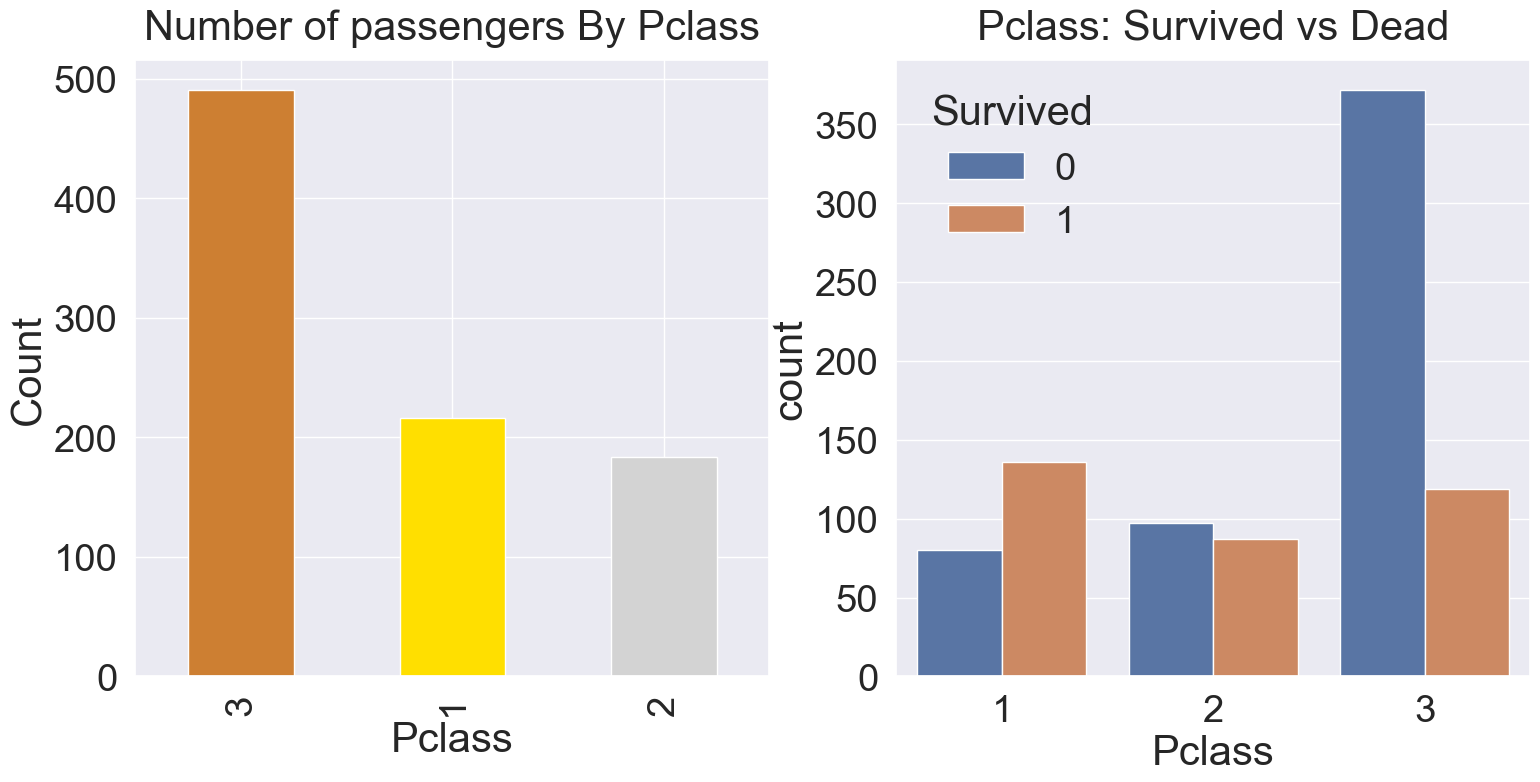

In [28]:
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize=(18,8))
df_train['Pclass'].value_counts().plot.bar(color = ['#CD7F32', '#FFDF00', '#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of passengers By Pclass', y=y_position)
ax[0].set_ylabel('Count')
sns.countplot(x='Pclass', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)
plt.show()

## 2.2 Sex

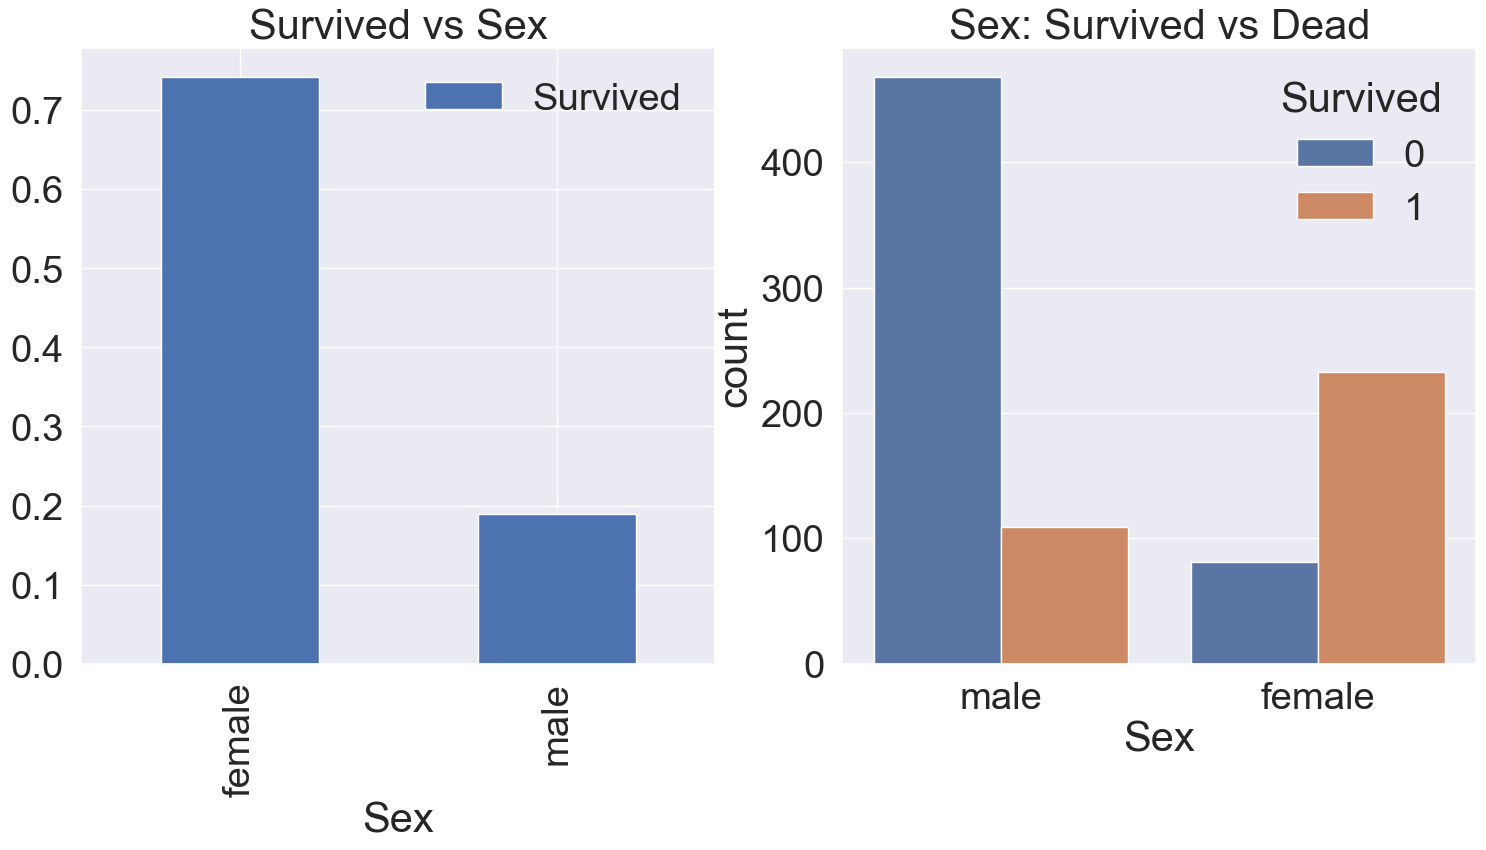

In [29]:
f, ax = plt.subplots(1, 2, figsize = (18,8))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot(x='Sex', hue='Survived', data=df_train, ax=ax[1]) # 'Sex'에서 x='Sex' 로 업데이트
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

In [30]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [31]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [32]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


## 2.2 Both Sex and Pclass

In [33]:
#module 'seaborn' has no attribute 'factorplot'
# !pip install --upgrade seaborn
# !pip install seaborn --upgrade

In [34]:
# factorplot seaborn에 안보임
'''
sns.factorplot(x='Pclass', y='Survived', hue='Sex', data=df_train, size=6, aspect=1.5)
'''


"\nsns.factorplot(x='Pclass', y='Survived', hue='Sex', data=df_train, size=6, aspect=1.5)\n"

- Lady first.
- Money brings survival?

## Age

In [35]:
print('제일 나이 많은 탑승객 : {:.1f} years'.format(df_train['Age'].max()))
print('제일 나이 적은 탑승객 : {:.1f} years'.format(df_train['Age'].min()))
print('탑승객 평균 나이 : {:.1f} years'.format(df_train['Age'].mean()))

제일 나이 많은 탑승객 : 80.0 years
제일 나이 적은 탑승객 : 0.4 years
탑승객 평균 나이 : 29.7 years


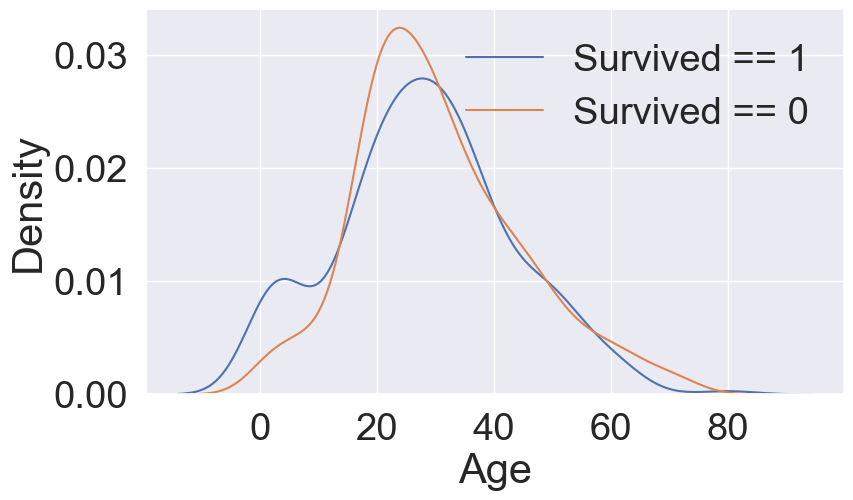

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax) # 'Survived == 1'이 True인 사람들만 담고, 그 사람들의 'Age'
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

<Axes: xlabel='Age', ylabel='Density'>

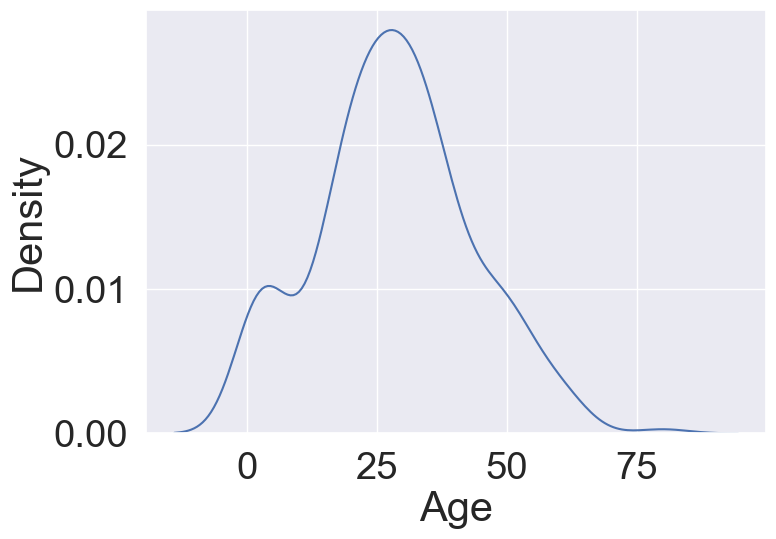

In [37]:
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'])

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

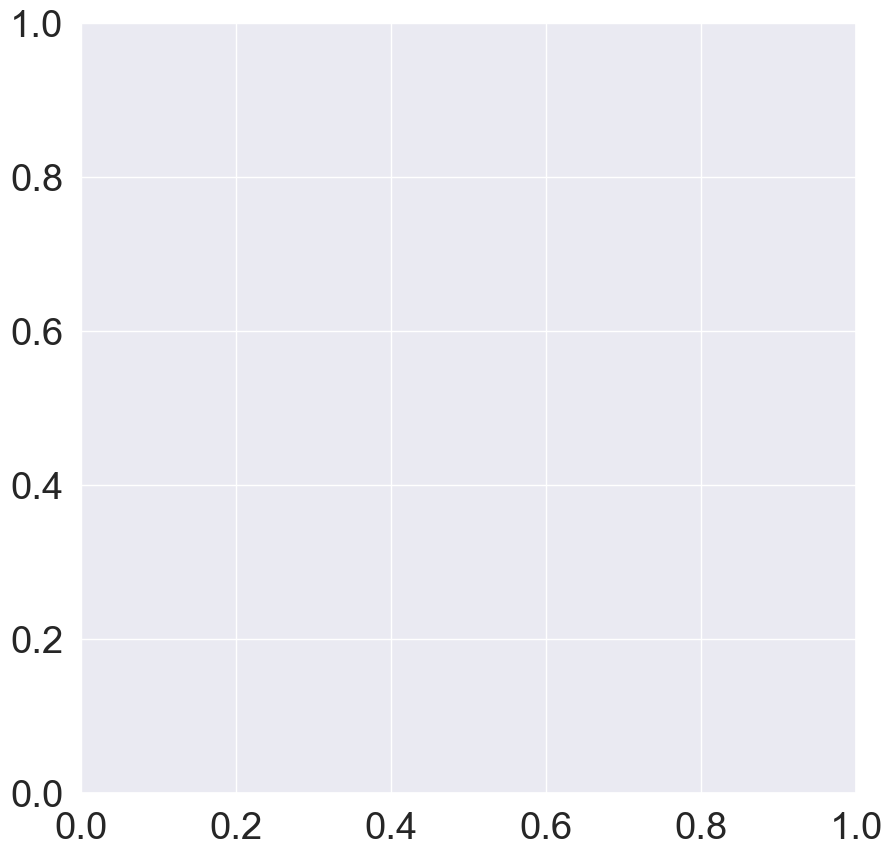

<Figure size 1000x1000 with 0 Axes>

In [38]:
# 도화지 준비

f = plt.figure(figsize=(10,10))

f, ax = plt.subplots(1,1,figsize=(10,10))

plt.figure(figsize=(10,10))

#같은 뜻이다.

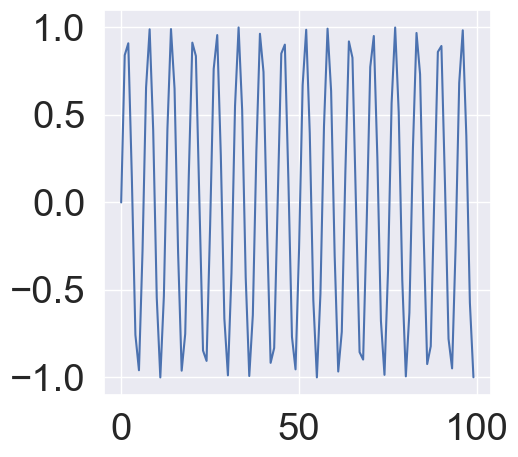

In [39]:
#f = plt.figure(figsize=(10,10))
plt.figure(figsize=(5,5))
a = np.arange(100)
b = np.sin(a)

plt.plot(b)

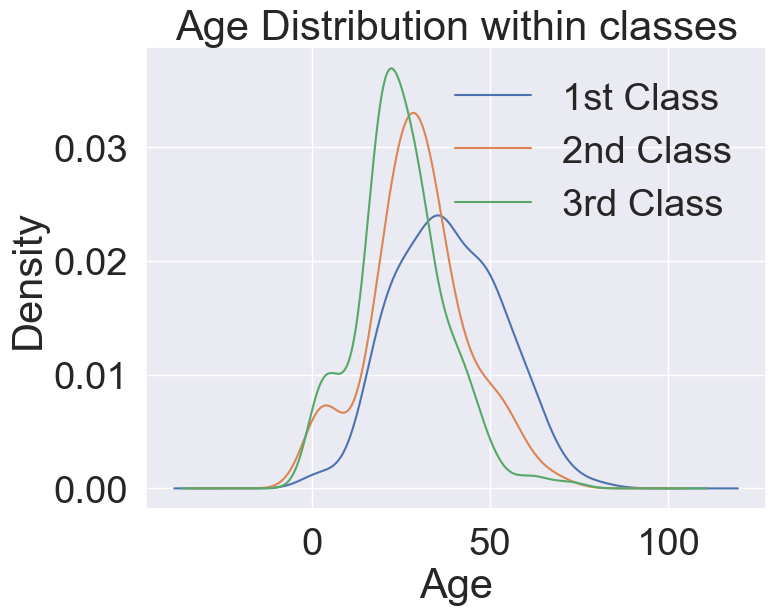

In [40]:
plt.figure(figsize=(8, 6))
df_train[df_train['Pclass'] == 1]['Age'].plot(kind='kde')
df_train[df_train['Pclass'] == 2]['Age'].plot(kind='kde')
df_train[df_train['Pclass'] == 3]['Age'].plot(kind='kde')
# df_train[df_train['Pclass'] == 1]['Age'].plot(kind='hist')
# df_train[df_train['Pclass'] == 2]['Age'].plot(kind='hist')
# df_train[df_train['Pclass'] == 3]['Age'].plot(kind='hist')

plt.xlabel('Age') # ax라면 'set_xlabel()'
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])


Text(0.5, 0, 'Age')

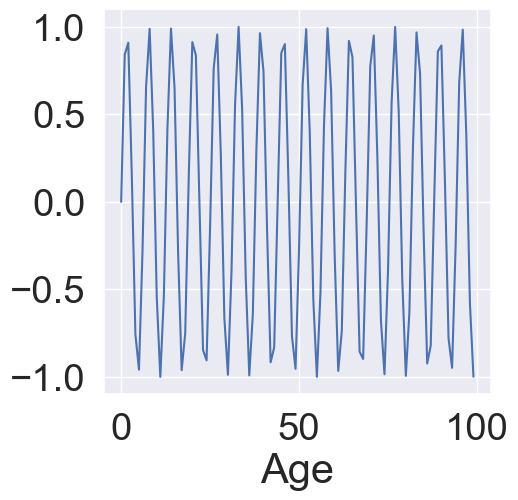

In [41]:
fig, ax = plt.subplots(1,1,figsize=(5,5))
a = np.arange(100)
b = np.sin(a)

ax.plot(b)
ax.set_xlabel('Age') #plt라면 'xlabel()'

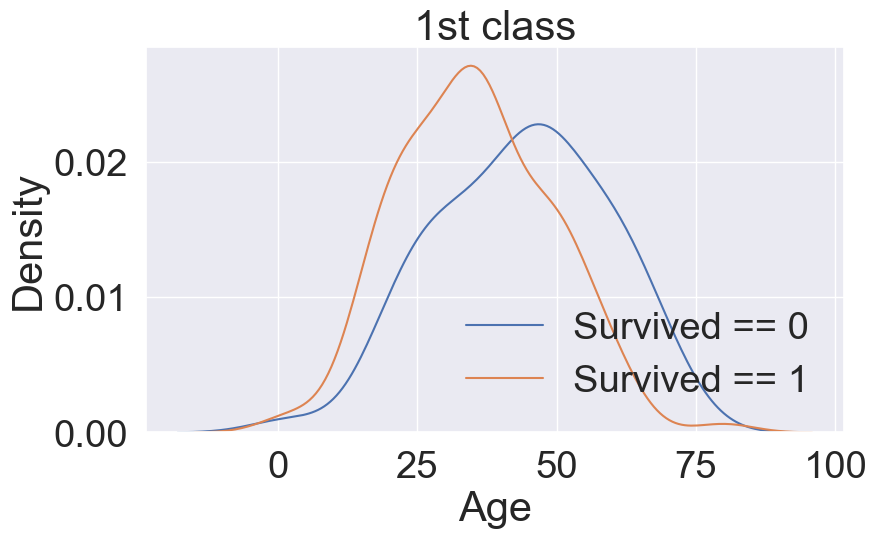

In [42]:
fig, ax = plt.subplots(1,1,figsize=(9,5))
sns.kdeplot(df_train[(df_train['Survived'] == 0) & (df_train['Pclass'] == 1)]['Age'], ax=ax)
sns.kdeplot(df_train[(df_train['Survived'] == 1) & (df_train['Pclass'] == 1)]['Age'], ax=ax)
plt.legend(['Survived == 0', 'Survived == 1'])
plt.title('1st class')
plt.show()

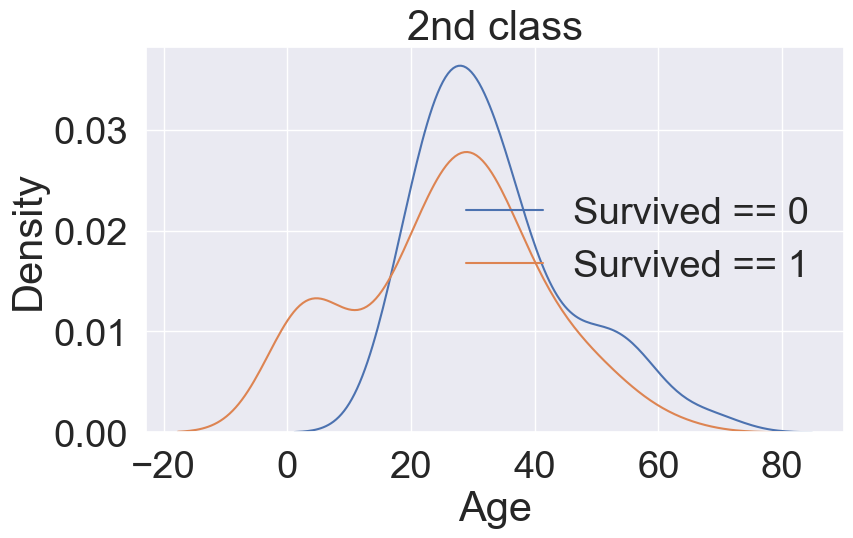

In [43]:
fig, ax = plt.subplots(1,1,figsize=(9,5))
sns.kdeplot(df_train[(df_train['Survived'] == 0) & (df_train['Pclass'] == 2)]['Age'], ax=ax)
sns.kdeplot(df_train[(df_train['Survived'] == 1) & (df_train['Pclass'] == 2)]['Age'], ax=ax)
plt.legend(['Survived == 0', 'Survived == 1'])
plt.title('2nd class')
plt.show()

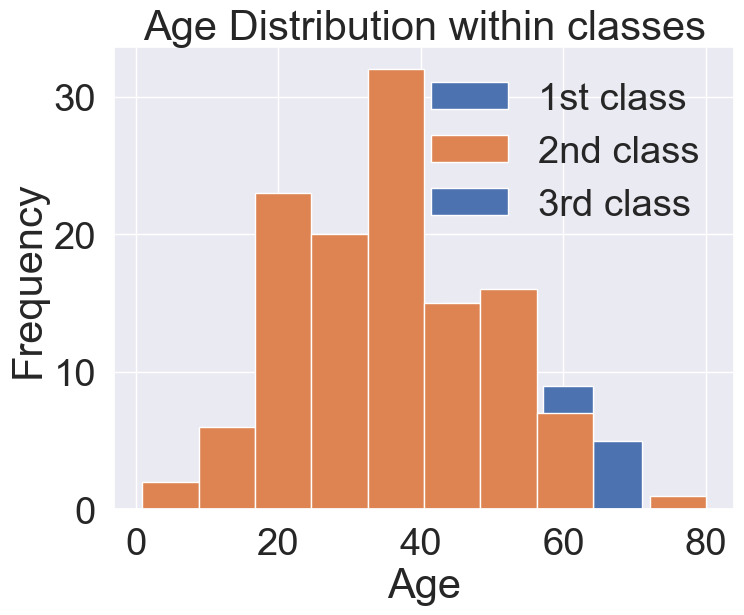

In [44]:
plt.figure(figsize=(8, 6))
df_train[(df_train['Pclass'] == 1) & (df_train['Survived'] == 0)]['Age'].plot(kind='hist')
df_train[(df_train['Pclass'] == 1) & (df_train['Survived'] == 1)]['Age'].plot(kind='hist')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st class', '2nd class', '3rd class'])


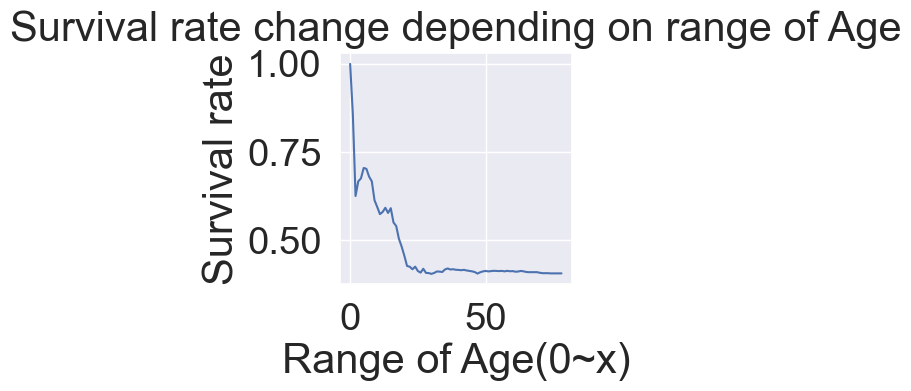

In [45]:
change_age_range_survival_ratio = []

for idx in range(1,80):
    change_age_range_survival_ratio.append(df_train[df_train['Age'] < idx]['Survived'].sum() / len(df_train[df_train['Age'] < idx]['Survived']))

plt.figure(figsize=(3,3))
plt.plot(change_age_range_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

- 나이가 어릴 수록 생존확률이 높다

In [46]:
idx = 10
df_train[df_train['Age'] < idx]['Survived'].sum() / len(df_train[df_train['Age'] < idx]['Survived'])

0.6129032258064516

In [47]:
df_train[df_train['Age'] < idx]['Survived'].sum()

38

In [48]:
df_train[df_train['Age'] < idx]['Survived'].shape

(62,)

## Pclass, Sex, Age

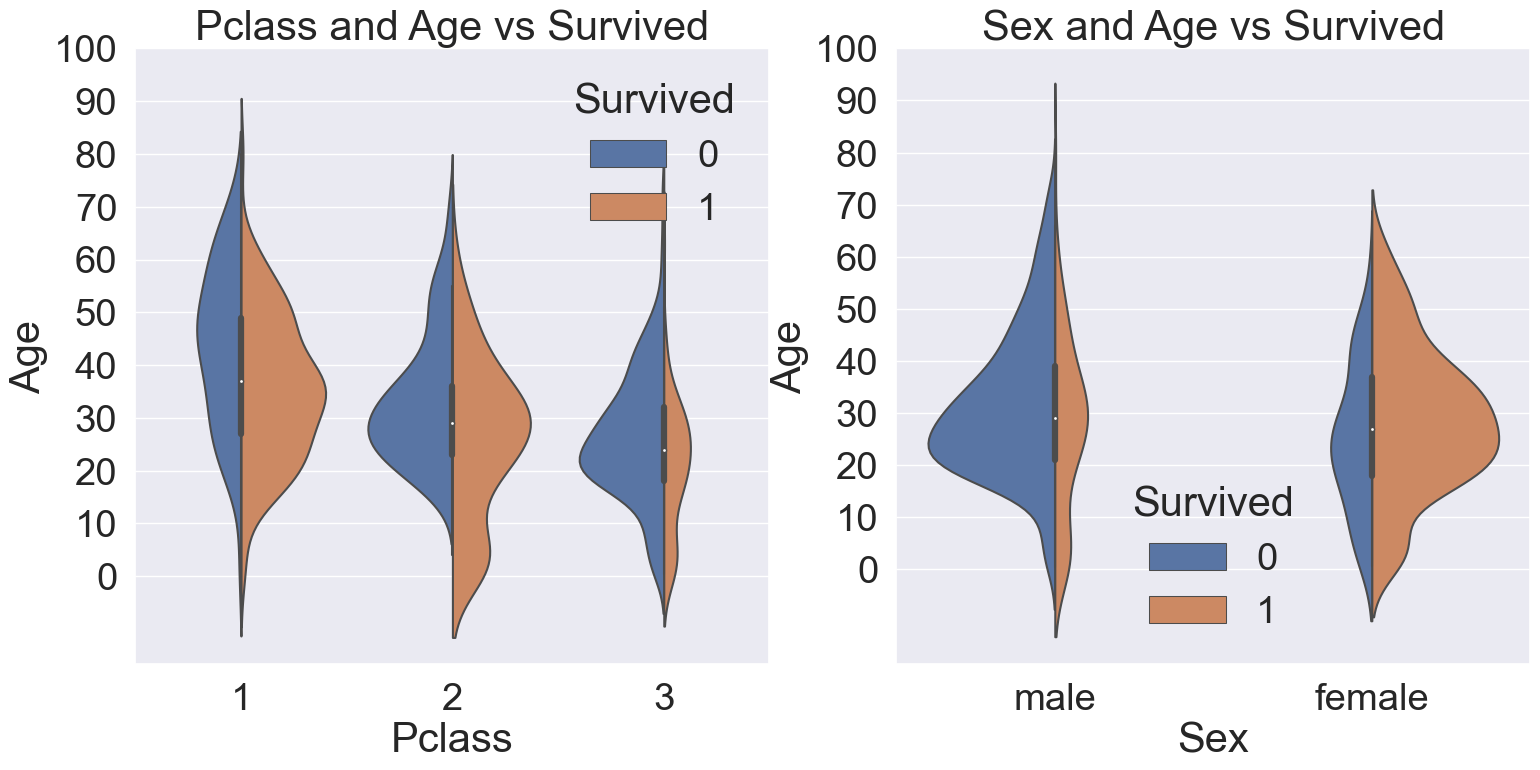

In [49]:
f, ax = plt.subplots(1,2,figsize=(18,8))
# scale 등으로 분포확인이나 수치확인을 조절할 수 있다.
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=df_train, scale='count', split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))

sns.violinplot(x='Sex', y='Age', hue='Survived', data=df_train, scale='count', split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))

plt.show()

## Embarked(탑승 항구)

<Axes: xlabel='Embarked'>

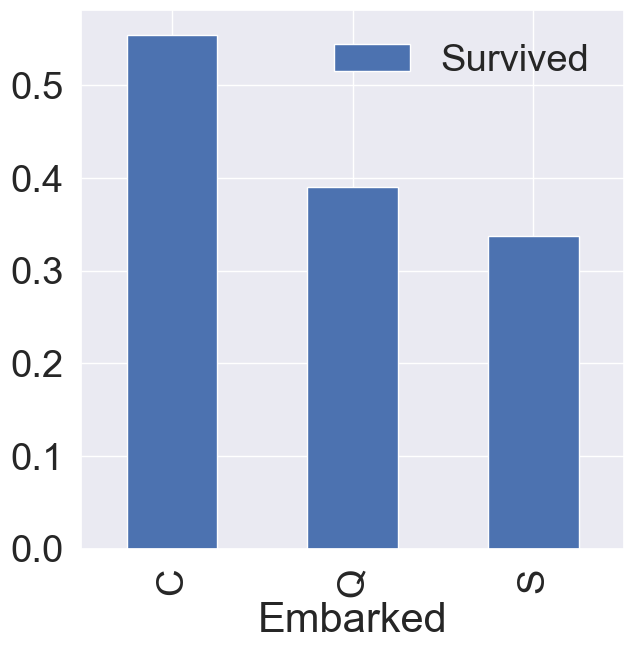

In [50]:
f, ax = plt.subplots(1,1,figsize=(7,7))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

In [51]:
#df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean()
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived')

,Survived
Embarked,
S,0.336957
Q,0.389610
C,0.553571


In [52]:
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_index()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


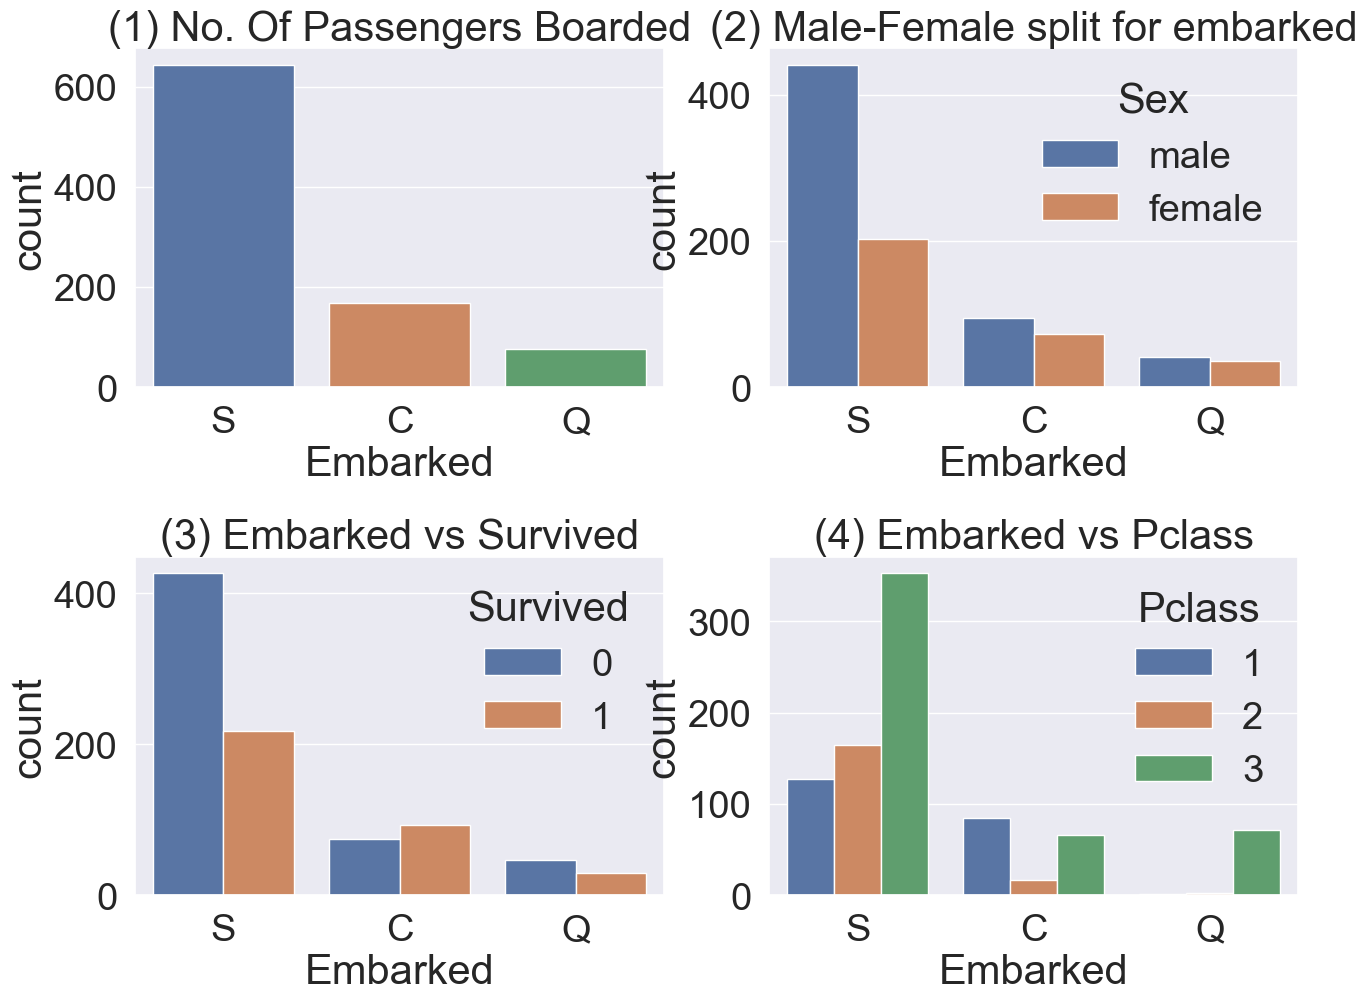

In [53]:
f, ax = plt.subplots(2,2,figsize=(15,11))
sns.countplot(x='Embarked', data=df_train, ax=ax[0,0]) # 0행 0열
ax[0,0].set_title('(1) No. Of Passengers Boarded')

sns.countplot(x='Embarked', hue='Sex', data=df_train, ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female split for embarked')

sns.countplot(x='Embarked', hue='Survived', data=df_train, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')

sns.countplot(x='Embarked', hue='Pclass', data=df_train, ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2, hspace=0.5)

## Family - SibSp + Parch

In [54]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1 
# 1은 본인 포함, pandas는 시리즈끼리 더할 수 있다.

In [55]:
df_train['FamilySize']

0      2
1      2
2      1
3      2
4      1
      ..
886    1
887    1
888    4
889    1
890    1
Name: FamilySize, Length: 891, dtype: int64

In [56]:
print('Maximum size of Family: ', df_train['FamilySize'].max())
print('Minimum size of Family: ', df_train['FamilySize'].min())

Maximum size of Family:  11
Minimum size of Family:  1


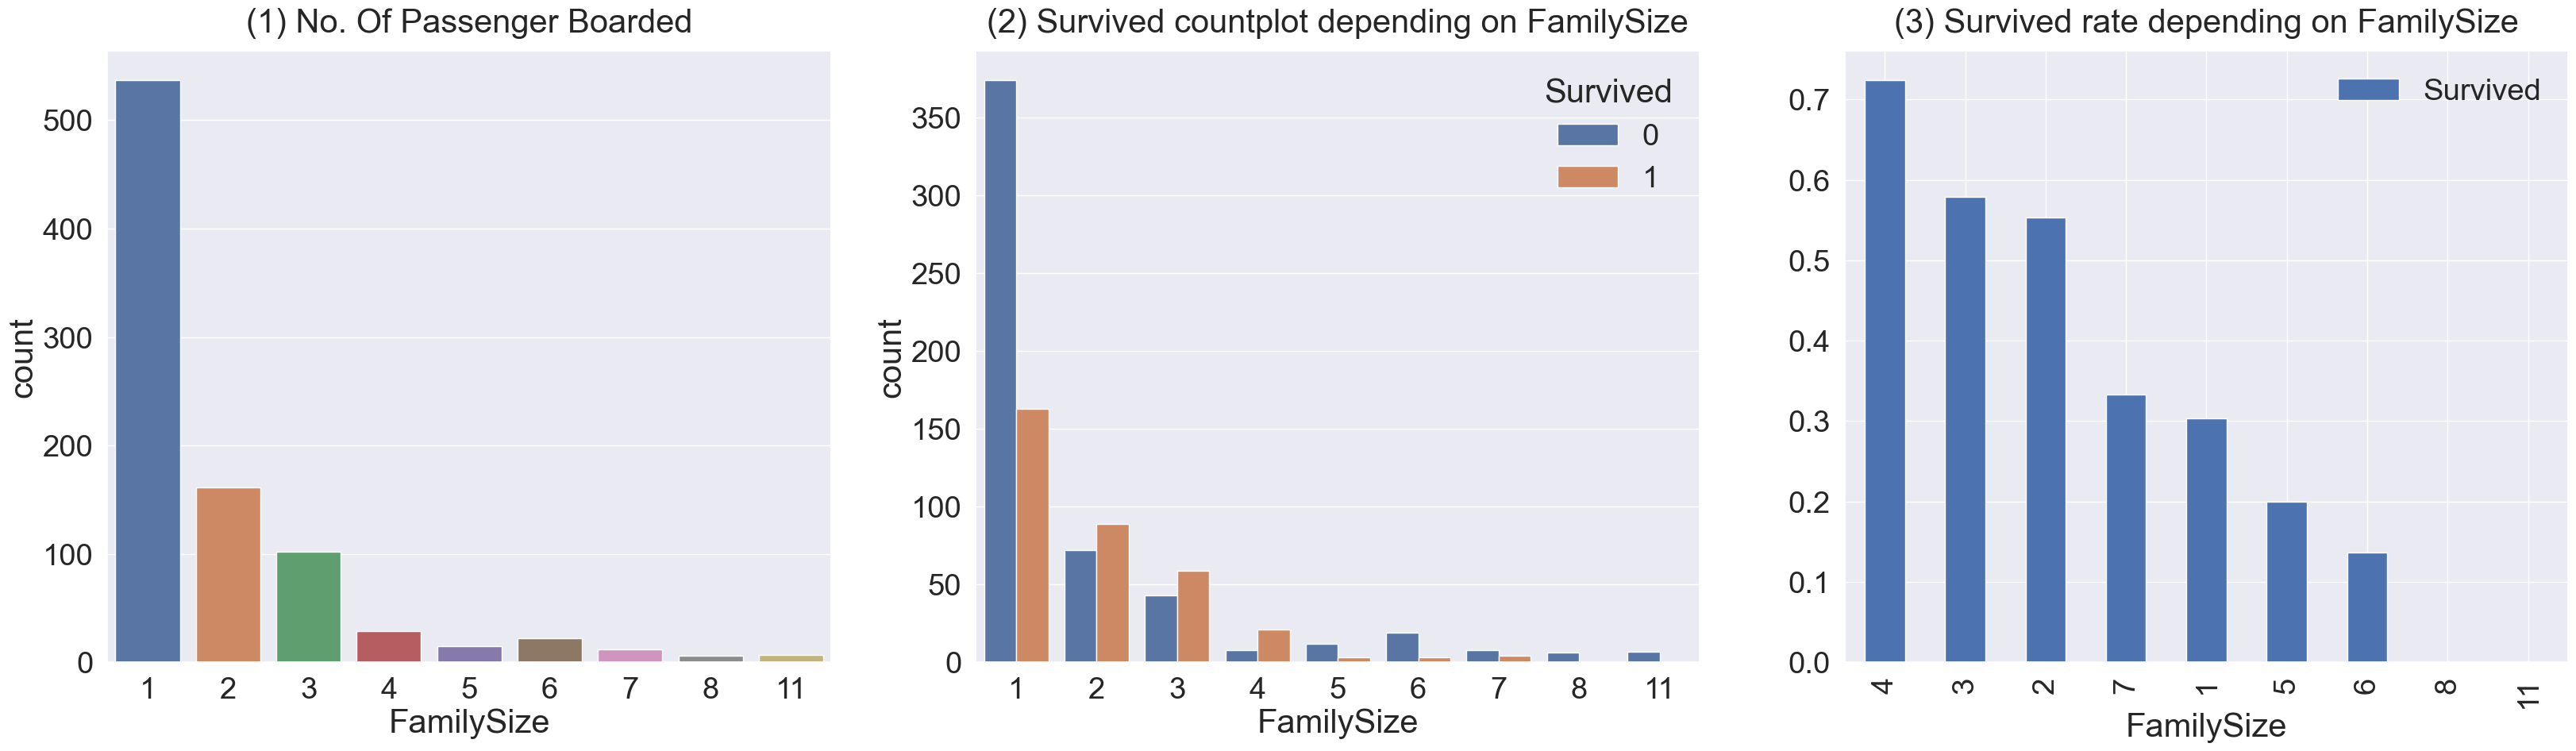

In [57]:
f, ax = plt.subplots(1,3,figsize=(40,10))
sns.countplot(x='FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) No. Of Passenger Boarded', y=1.02)

sns.countplot(x='FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize', y=1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize', y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## Fare

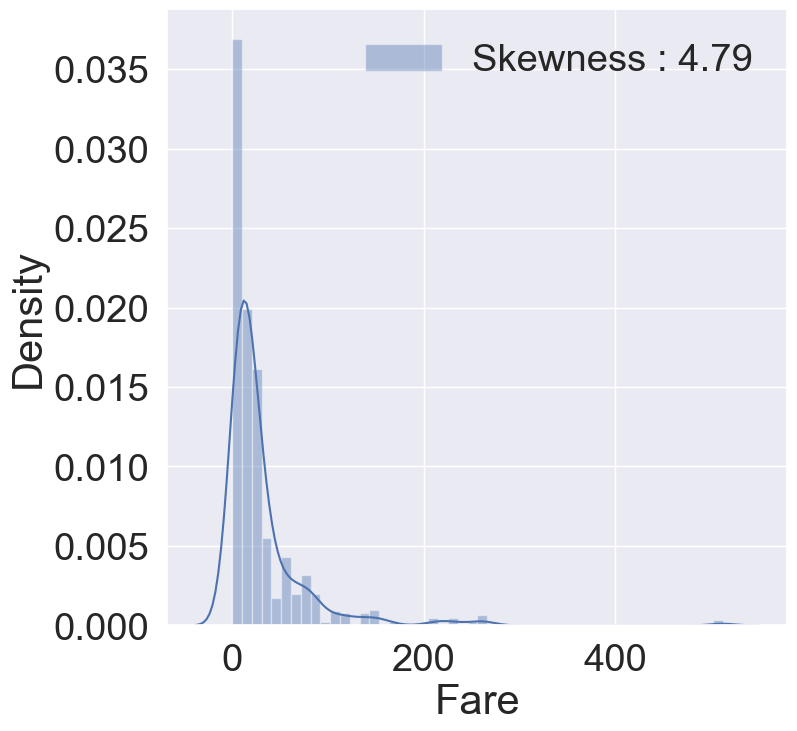

In [58]:
fig, ax= plt.subplots(1,1,figsize=(8,8))
g = sns.distplot(df_train['Fare'], color = 'b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

In [59]:
df_train['Fare'] = df_train['Fare'].map(lambda i:np.log(i) if i>0 else 0)
# map() method is used to apply a function to each element of the selected column
# 이런 류를 'feature engineering' 라고 하는 듯 하다.

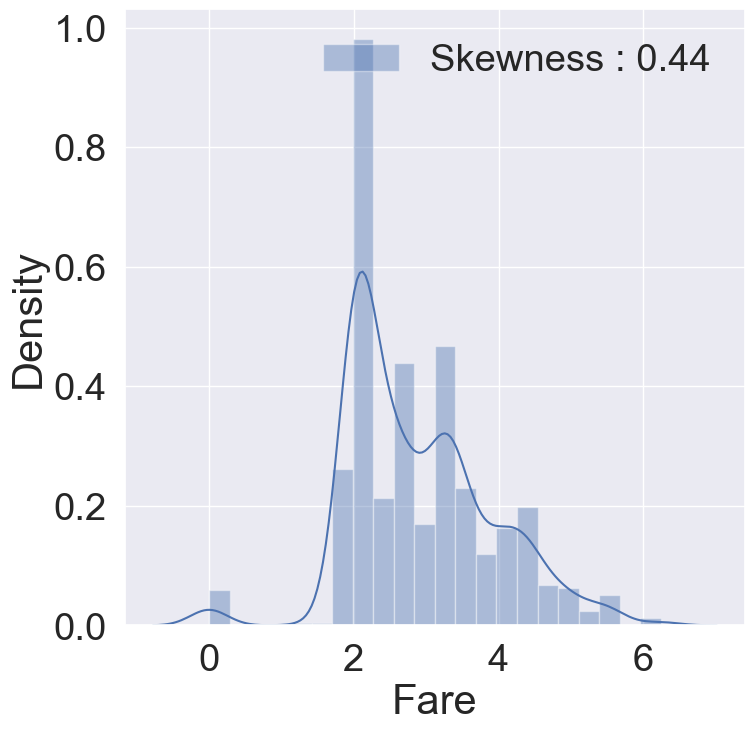

In [60]:
fig, ax= plt.subplots(1,1,figsize=(8,8))
g = sns.distplot(df_train['Fare'], color = 'b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

In [61]:
x = lambda i : i * i
y = lambda a, b : a ** b
x(3), y(3,2)

(9, 9)

In [62]:
df_train['Ticket'].value_counts()

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64

## Feature Engineering